Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Data Collection and Processing

In [2]:
# loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv('heart.csv')

In [3]:
# print first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# print last 5 rows of the dataset
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# number of rows and columns in the dataset
heart_data.shape

(303, 14)

In [6]:
# getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# checking for missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
# statistical measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
# checking the distribution of Target Variable
heart_data['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

1 --> Defective Heart

0 --> Healthy Heart

Splitting the Features and Target

In [10]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [11]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [12]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


Splitting the Data into Training data & Test Data

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [14]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


Model Training

# RNN

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM


In [16]:
model=Sequential()

model.add(LSTM(10,input_shape=(None,1),activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

In [17]:
history = model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=200,batch_size=32,verbose=1)

Epoch 1/200

8/8 [==============================] - 2s 62ms/step - loss: 4.6372 - val_loss: 1.2639
Epoch 2/200
8/8 [==============================] - 0s 12ms/step - loss: 0.5095 - val_loss: 0.4562
Epoch 3/200
8/8 [==============================] - 0s 16ms/step - loss: 0.5357 - val_loss: 0.2478
Epoch 4/200
8/8 [==============================] - 0s 17ms/step - loss: 0.2754 - val_loss: 0.2919
Epoch 5/200
8/8 [==============================] - 0s 18ms/step - loss: 0.3104 - val_loss: 0.2717
Epoch 6/200
8/8 [==============================] - 0s 17ms/step - loss: 0.2540 - val_loss: 0.2386
Epoch 7/200
8/8 [==============================] - 0s 10ms/step - loss: 0.2520 - val_loss: 0.2454
Epoch 8/200
8/8 [==============================] - 0s 13ms/step - loss: 0.2464 - val_loss: 0.2390
Epoch 9/200
8/8 [==============================] - 0s 11ms/step - loss: 0.2415 - val_loss: 0.2429
Epoch 10/200
8/8 [==============================] - 0s 9ms/step - loss: 0.2368 - val_loss: 0.2317
Epoch 11/200
8/8 [=

8/8 [==============================] - 0s 12ms/step - loss: 0.1374 - val_loss: 0.1517
Epoch 82/200
8/8 [==============================] - 0s 13ms/step - loss: 0.1366 - val_loss: 0.1693
Epoch 83/200
8/8 [==============================] - 0s 13ms/step - loss: 0.1392 - val_loss: 0.1580
Epoch 84/200
8/8 [==============================] - 0s 15ms/step - loss: 0.1422 - val_loss: 0.1788
Epoch 85/200
8/8 [==============================] - 0s 12ms/step - loss: 0.1380 - val_loss: 0.1499
Epoch 86/200
8/8 [==============================] - 0s 16ms/step - loss: 0.1419 - val_loss: 0.1516
Epoch 87/200
8/8 [==============================] - 0s 15ms/step - loss: 0.1362 - val_loss: 0.1615
Epoch 88/200
8/8 [==============================] - 0s 15ms/step - loss: 0.1351 - val_loss: 0.1510
Epoch 89/200
8/8 [==============================] - 0s 15ms/step - loss: 0.1393 - val_loss: 0.1523
Epoch 90/200
8/8 [==============================] - 0s 14ms/step - loss: 0.1343 - val_loss: 0.1573
Epoch 91/200
8/8 [=====

8/8 [==============================] - 0s 14ms/step - loss: 0.1270 - val_loss: 0.1624
Epoch 164/200
8/8 [==============================] - 0s 15ms/step - loss: 0.1249 - val_loss: 0.1602
Epoch 165/200
8/8 [==============================] - 0s 20ms/step - loss: 0.1291 - val_loss: 0.1854
Epoch 166/200
8/8 [==============================] - 0s 15ms/step - loss: 0.1267 - val_loss: 0.1616
Epoch 167/200
8/8 [==============================] - 0s 15ms/step - loss: 0.1233 - val_loss: 0.1890
Epoch 168/200
8/8 [==============================] - 0s 13ms/step - loss: 0.1267 - val_loss: 0.1584
Epoch 169/200
8/8 [==============================] - 0s 12ms/step - loss: 0.1230 - val_loss: 0.1759
Epoch 170/200
8/8 [==============================] - 0s 12ms/step - loss: 0.1248 - val_loss: 0.1644
Epoch 171/200
8/8 [==============================] - 0s 15ms/step - loss: 0.1241 - val_loss: 0.1649
Epoch 172/200
8/8 [==============================] - 0s 15ms/step - loss: 0.1262 - val_loss: 0.1633
Epoch 173/200


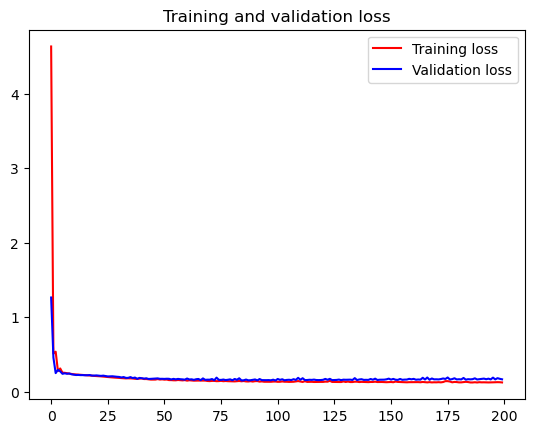

<Figure size 640x480 with 0 Axes>

In [18]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [19]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

2/2 [==============================] - 0s 7ms/step


((242, 1), (61, 1))

# Boosting model

In [20]:
#AdaBoost
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, random_state=0)

In [21]:
clf.fit(X_train, Y_train.values.ravel()) 

C:\Users\vigne\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=100, random_state=0)

In [22]:
print("TRAIN SET", clf.score(X_train, Y_train))
print("TEST  SET", clf.score(X_test, Y_test))

TRAIN SET 0.9545454545454546
TEST  SET 0.7540983606557377


In [23]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, Y.values.ravel(), cv=4)
scores

C:\Users\vigne\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\vigne\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\vigne\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\vigne\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


array([0.84210526, 0.85526316, 0.69736842, 0.72      ])

In [24]:
print("Average: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Average: 0.78 (+/- 0.14)


In [25]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc

In [26]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    target_names=['attack','not attack']
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[23  5]
 [10 23]]


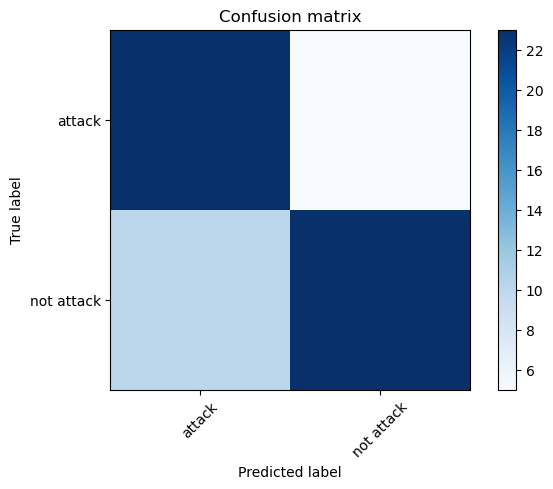

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(Y_test, clf.predict(X_test))
print(cm)
plot_confusion_matrix(cm)

In [28]:
print(classification_report(Y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.70      0.82      0.75        28
           1       0.82      0.70      0.75        33

    accuracy                           0.75        61
   macro avg       0.76      0.76      0.75        61
weighted avg       0.76      0.75      0.75        61



Building a Predictive System

In [29]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

1/1 [==============================] - 0s 212ms/step
[[0.4737404]]
The Person has Heart Disease


Saving the trained model

In [30]:
import pickle

In [31]:
filename = 'heart_disease_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [32]:
# loading the saved model
loaded_model = pickle.load(open('heart_disease_model.sav', 'rb'))

In [33]:
for column in X.columns:
  print(column)

age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal
